# Final assessement for the course "Python for Data Science and AI" by IBM

### 1. Task 1: Become familiar with the dataset
### 2. Task 2: Task 2 is optional
### 3. Task 3: Load dataset from CSV files
### 4. Task 4: Generate Descriptive Statistics and Visualizations
### 5. Task 5: Use the appropriate tests to answer the question provided.
### 6. Task 6: Share the link to your Notebook on GitHub
- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


## Task 1: Become familiar with the dataset

In [ ]:
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [31]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Task 3: Loading the dataset

In [3]:
#loading dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)


In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.describe()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 4: Generate Descriptive Statistics and Visualizations 


- Question 1: For the "Median value of owner-occupied homes" provide a boxplot.

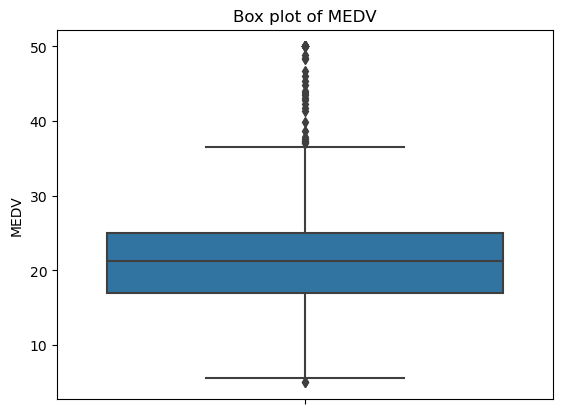

In [7]:
fig = sns.boxplot(y="MEDV", data=boston_df)
plt.title("Box plot of MEDV")
plt.show()

The boxplot shows the median for the variable MEDV among with outliers

- Question 2: Provide a histogram for the Charles River variable

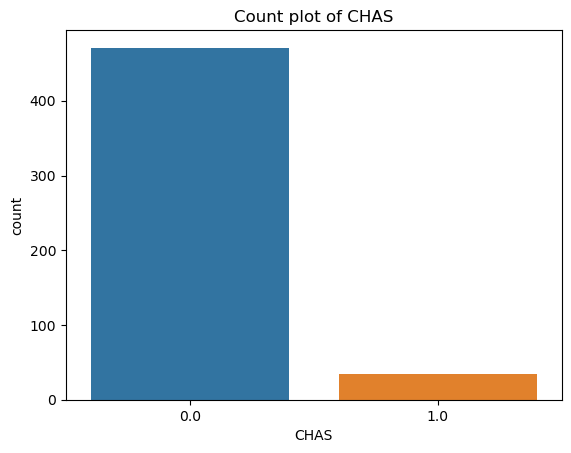

In [28]:
fig2 = sns.countplot(x="CHAS", data=boston_df)
fig2.set_title("Count plot of CHAS")
plt.show()

- Question3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

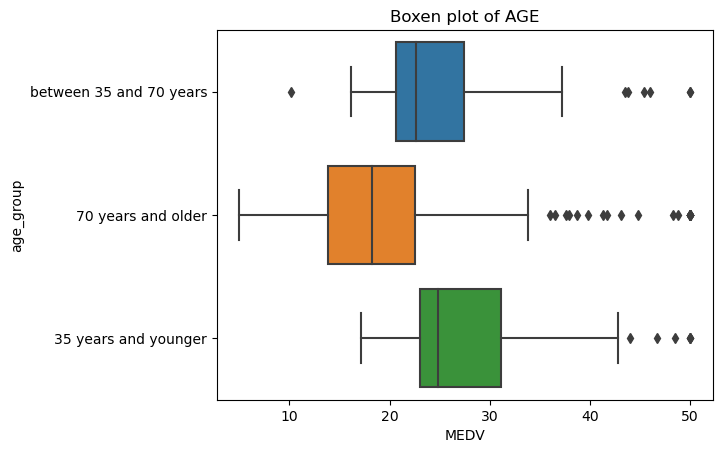

In [25]:
boston_df.loc[boston_df['AGE'] < 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'age_group'] = '70 years and older'

fig3 = sns.boxplot(x='MEDV',y="age_group", data=boston_df)
fig3.set_title("Box plot of AGE")
plt.show()

- Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

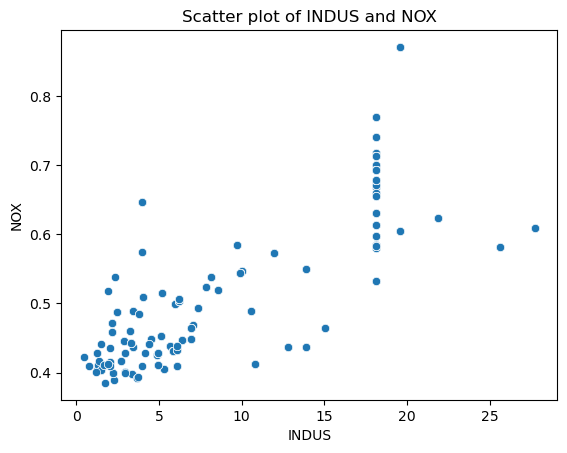

In [26]:
fig4 = sns.scatterplot(x='INDUS',y="NOX", data=boston_df)
fig4.set_title("Scatter plot of INDUS and NOX")
plt.show()

- Question 5: Create a histogram for the pupil to teacher ratio variable.

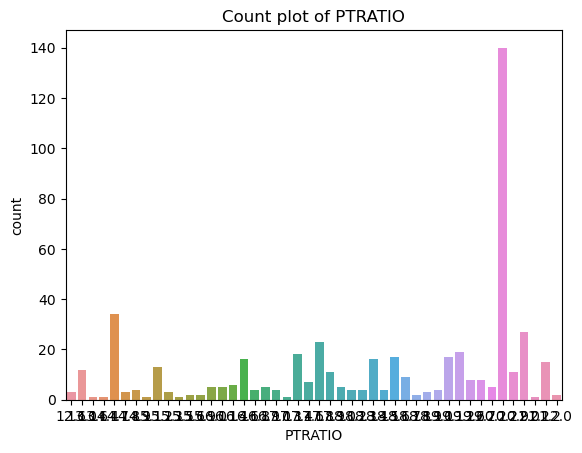

In [27]:
fig5 = sns.countplot(x="PTRATIO", data=boston_df)
fig5.set_title("Count plot of PTRATIO")
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

- Quetion 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypoyhesis:
1. Null Hypothesis (H0): There is no significant difference in the median house values between houses bounded by the Charles river and those not bounded (μ1 = μ2).
2. Alternative Hypothesis (H1): There is a significant difference in the median house values between these two groups (μ1 ≠ μ2).

In [29]:
boston_df.loc[(boston_df['CHAS'] == 0),'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1),'CHAS_T'] = 'CLOSE'
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR


In [35]:
stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'],boston_df[boston_df['CHAS_T'] == 'CLOSE']['MEDV'])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Given the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is not a statistical difference in median value betwenn houses near the Charles River and houses far away

- Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)





Hyphothesis:
1. There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.
2. There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

In [45]:
import statsmodels.api as sm

# Create and fit the model
model = ols('MEDV ~ AGE', data=boston_df).fit()

# Perform ANOVA
table = sm.stats.anova_lm(model)
print(table)


             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


With a p-value less than 0.05, we reject the null hypothesis.
There is a significant difference in median house values among different proportions of owner-occupied units built before 1940



- Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypotesis:

Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town.

Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town.

In [46]:
stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Given the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town

- Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [53]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predecision = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        15:03:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""